In [1]:
import atomap.api as am
import atomap
import matplotlib.pyplot as plt
import os
import mplcyberpunk
import matplotlib 
import numpy as np
import atomap.dummy_data as dummy_data
import hyperspy.api as hs
import scipy
import ase
import ase.io
from ase.io import read
from ase.build import surface
import abtem
from matplotlib_scalebar.scalebar import ScaleBar 

plt.style.use('cyberpunk')
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
#need to be set for the interactive GUI
%matplotlib ipympl

## global adjustment of fig size in jupyter
plt.rcParams['figure.figsize'] = [5, 5]

## build lattice with ASE:

In [2]:

#load cifs
WS2_cell = ase.io.read("/masc_shared/ag_volz/Py4dSTEM_tutorial-data/WS2.cif")


In [17]:
# orthogonalize the cell
WS2_cell, transform = abtem.orthogonalize_cell(
    WS2_cell, max_repetitions=10, return_transform=True
)

# expand cells
WS2_cell_expanded = WS2_cell*(200,120,1)
# WS2_cell_expanded = WS2_cell*(10,7,1)


# #plot i 

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
# abtem.show_atoms(WS2_cell_expanded, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
# abtem.show_atoms(WS2_cell_expanded, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
#                  legend=True)
# abtem.show_atoms(WS2_cell_expanded, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
#                  legend=True)

# fig.tight_layout()
# fig.suptitle('WS2_cell_expanded')

In [18]:
WS2_cell_cut = ase.build.cut(WS2_cell_expanded,(1, 0, 0),(0, 1, 0),(0, 0, 0.5))
# WS2_cell_cut.wrap()
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
# abtem.show_atoms(WS2_cell_cut, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
# abtem.show_atoms(WS2_cell_cut, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
#                  legend=True)
# abtem.show_atoms(WS2_cell_cut, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
#                  legend=True)

# fig.tight_layout()
# fig.suptitle('WS2_cell_cut')

In [19]:
## expand second lattice constant
WS2_cell_increased_a = WS2_cell_cut.copy()
# 
new_cell = WS2_cell_cut.cell*1.006
# new_cell = WS2_cell_cut.cell*1.06
new_cell
WS2_cell_increased_a.set_cell(new_cell, scale_atoms=True)


KeyboardInterrupt: 

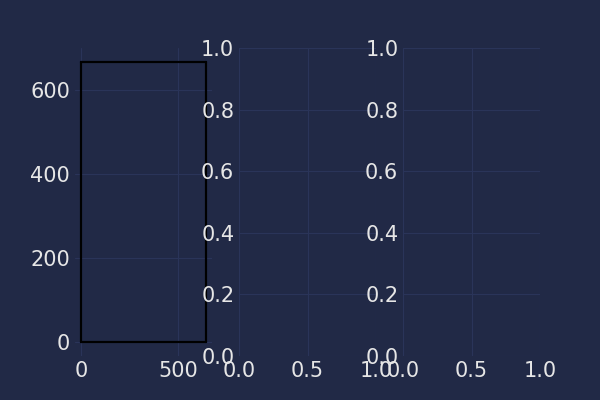

In [20]:
# WS2_cell_cut.wrap()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(WS2_cell_increased_a, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(WS2_cell_increased_a, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(WS2_cell_increased_a, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('WS2_cell_cut2')

In [21]:
# extract W positions

mask_W = WS2_cell_cut.numbers == 74
W_pos1 = WS2_cell_cut.positions[mask_W]

mask_W2 = WS2_cell_increased_a.numbers == 74
W_pos2 = WS2_cell_increased_a.positions[mask_W2]

## Build Moire cell

In [108]:
# stack with angle
WS2_cell_cut_rot = WS2_cell_cut.copy()
WS2_cell_cut_rot.rotate(0.4,'z')

# WS2_cell_cut.wrap()
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
# abtem.show_atoms(WS2_cell_cut_rot, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
# abtem.show_atoms(WS2_cell_cut_rot, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
#                  legend=True)
# abtem.show_atoms(WS2_cell_cut_rot, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
#                  legend=True)

# fig.tight_layout()
# fig.suptitle('WS2_cell_cut_rot')

In [109]:
# extract W positions

mask_W = WS2_cell_cut.numbers == 74
W_pos1 = WS2_cell_cut.positions[mask_W]

mask_W2 = WS2_cell_cut_rot.numbers == 74
W_pos2 = WS2_cell_cut_rot.positions[mask_W2]

## Plot Next Neighbour distances

In [22]:
## define save paths

## import the data
fp = '//masc_shared/ag_volz/Oliver_Maßmeyer/AIXTRON/WS2_GR_EELS_Sample/20240924_WS2_Gr_EELS_Sample/STEM_DATA/HR_stiching'

##create folder for results
fsf = 'Evaluation_Constructed_Cells'
# fsf = 'Evaluation_Constructed_Cells_Moire'
if not os.path.exists(os.path.join(fp,fsf)):
    os.mkdir(os.path.join(fp,fsf))


In [23]:
## assign the W positions

seperated_lattice = W_pos1[:,0:2]
second_sublattice_pos = W_pos2[:,0:2]

In [131]:
## save the positions
np.savetxt(os.path.join(fp,fsf,'Sublattice1_Atom_Positions.txt'), seperated_lattice)
np.savetxt(os.path.join(fp,fsf,'Sublattice2_Atom_Positions.txt'), second_sublattice_pos)

In [24]:
## get pos closest to the center of the image
image_center = np.array([320, 320])

KD_tree_for_center = scipy.spatial.KDTree(seperated_lattice)
KD_center_res = KD_tree_for_center.query(image_center)
center_pos_lattice1 = seperated_lattice[KD_center_res[1]]
center_pos_lattice1

array([320.66839815, 319.6163241 ])

In [25]:

## find closest position
seperated_lattice_as_np_array = np.array(seperated_lattice)
# pos1 = seperated_lattice_as_np_array[0] ## takes center postion from intial selection
pos1 = center_pos_lattice1 ## takes center postion from intial selection
#create KD_tree
## create KDtree if needed
tree2 = scipy.spatial.KDTree(second_sublattice_pos)
KD_res2 = tree2.query(pos1)

pos2 = second_sublattice_pos[KD_res2[1]]

shift_vector = pos1-pos2
shift_vector

second_sublattice_pos_shifted = second_sublattice_pos+shift_vector

In [26]:
print('pos1:', pos1)
print('pos2:', pos2)
print('shift_vector:', shift_vector)

pos1: [320.66839815 319.6163241 ]
pos2: [320.98747118 318.754189  ]
shift_vector: [-0.31907303  0.8621351 ]


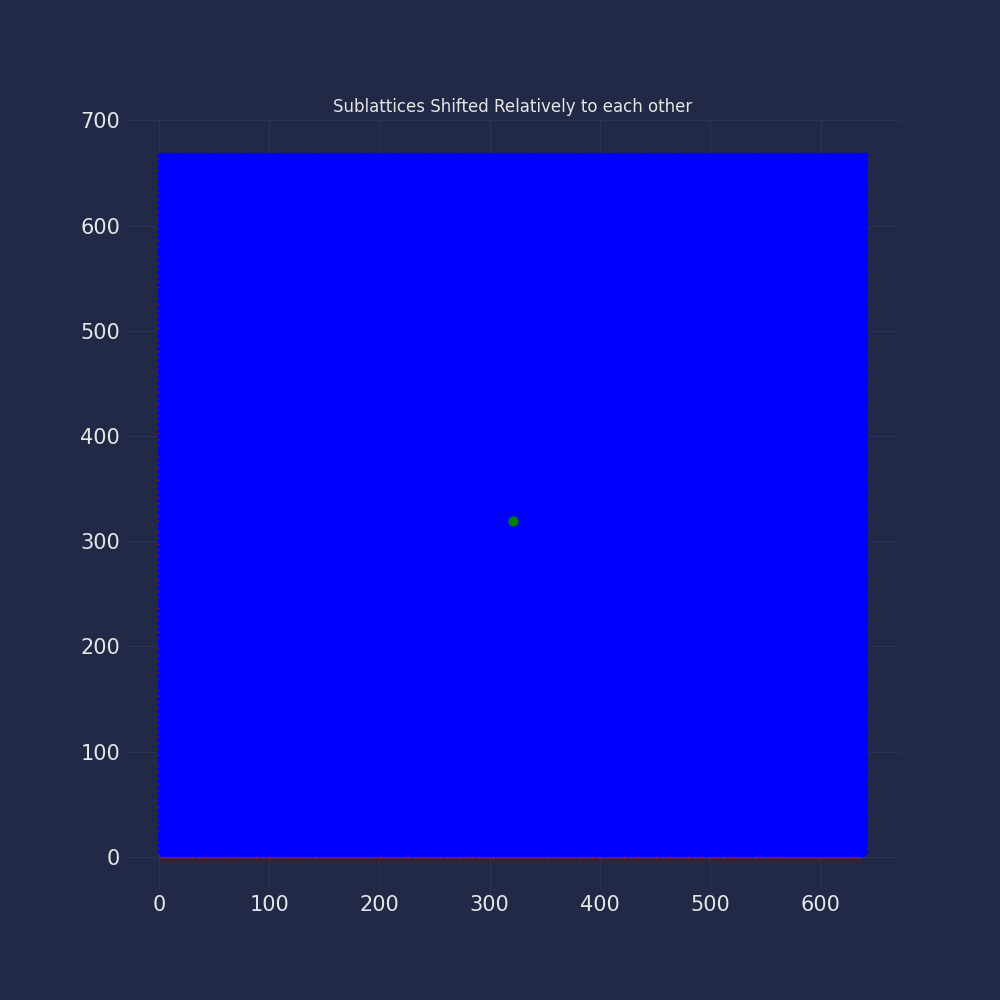

In [27]:
##Sublattices Shifted Relatively to each other
plt.rcParams['figure.figsize'] = [10, 10]
plt.close('all')
# plt.matshow(your_image.data,cmap='gray')
plt.scatter(seperated_lattice_as_np_array[:,0], seperated_lattice_as_np_array[:,1],c='red',s=10)
plt.scatter(second_sublattice_pos_shifted[:,0], second_sublattice_pos_shifted[:,1],c='blue',s=10)
plt.scatter(pos1[0],pos1[1], c='green', s = 40)
plt.title('Sublattices Shifted Relatively to each other')
plt.show()


In [28]:
## loopie loopie looop again
KD_tresh2 = 2
##new KD_tree
shift_vec_list = [] 
shift_vec_mag_list = []
tree3 = scipy.spatial.KDTree(second_sublattice_pos_shifted)
for eintrag in seperated_lattice_as_np_array:
    KD_res3 = tree3.query(eintrag)
    if KD_res3[0] < KD_tresh2:
        found_pos = second_sublattice_pos_shifted[KD_res3[1]]
        shift_vec = eintrag-second_sublattice_pos_shifted[KD_res3[1]]
        shift_vec_list.append(np.append(found_pos,shift_vec))
        
        shift_vec_mag = np.linalg.norm(shift_vec)
        shift_vec_mag_list.append(np.append(found_pos,shift_vec_mag))
        
shift_vec_mag_list = np.array(shift_vec_mag_list)
shift_vec_list = np.array(shift_vec_list)

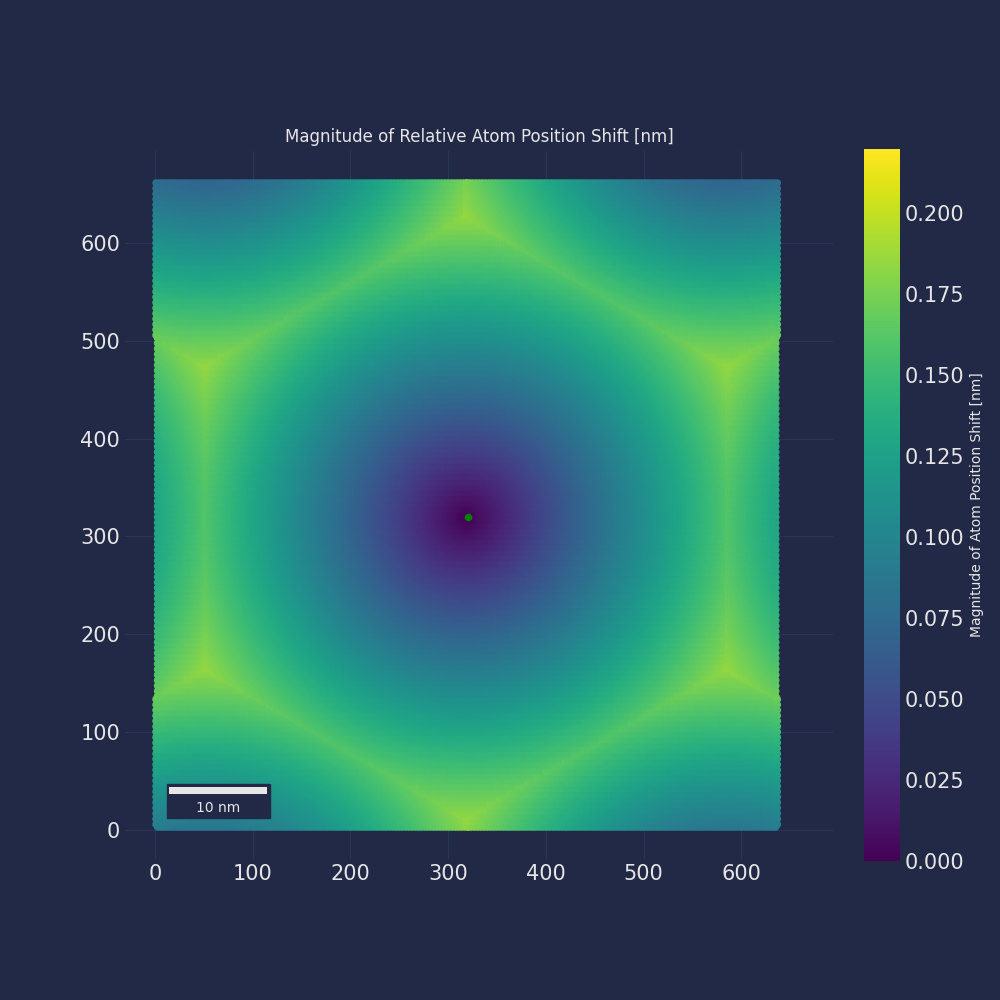

In [29]:
##overlay - difference of atom positions MAG
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.cmap'] = 'viridis'
# plt.rcParams['axes.formatter.limits'] = 'equal'

scale_fac = 1e-10 # m to nm
scale_fac_nm = 0.1 # A to nm

plt.close('all')
# plt.matshow(your_image.data,cmap='gray')
sc = plt.scatter(shift_vec_mag_list[:,0], shift_vec_mag_list[:,1],c=shift_vec_mag_list[:,2]*scale_fac_nm,s=20,vmin=0,vmax = 0.22)
plt.scatter(pos1[0],pos1[1], c='green', s = 20)
plt.colorbar(sc,fraction=0.046, pad=0.04, label='Magnitude of Atom Position Shift [nm]')
plt.title('Magnitude of Relative Atom Position Shift [nm]')
plt.axis('square')
plt.gca().add_artist(ScaleBar(scale_fac, location='lower left',border_pad=3,color = '0.9',box_color='#212946')) #scalebar in cyberpunk style
plt.show()



# ## test save as svg
# plt.rcParams['svg.fonttype'] = 'none'
# plt.savefig(os.path.join(fp,fsf,"Magnitude.svg"),dpi = 300)
# plt.savefig(os.path.join(fp,fsf,"Magnitude.png"),dpi = 300)

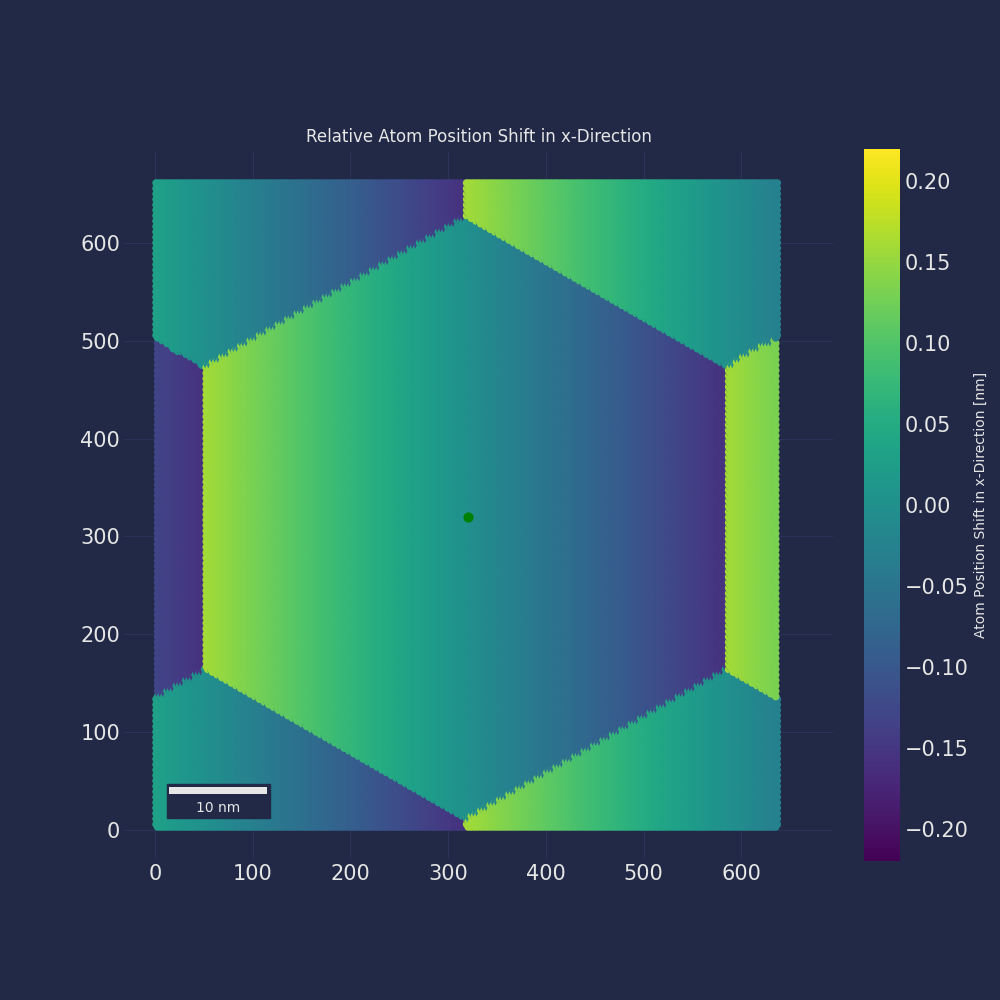

In [30]:
#x-direction
plt.close('all')
# plt.matshow(your_image.data,cmap='gray')
sc = plt.scatter(shift_vec_list[:,0], shift_vec_list[:,1],c=shift_vec_list[:,2]*scale_fac_nm,s=20,vmin=-0.22,vmax = 0.22)
plt.scatter(pos1[0],pos1[1], c='green', s = 40)
plt.colorbar(sc,fraction=0.046, pad=0.04, label='Atom Position Shift in x-Direction [nm]')
plt.title('Relative Atom Position Shift in x-Direction')
plt.axis('square')
plt.gca().add_artist(ScaleBar(scale_fac, location='lower left',border_pad=3,color = '0.9',box_color='#212946')) #scalebar in cyberpunk style
plt.show()


# ## test save as svg
# plt.rcParams['svg.fonttype'] = 'none'
# plt.savefig(os.path.join(fp,fsf,"Shift_x_Direction.svg"),dpi = 300)
# plt.savefig(os.path.join(fp,fsf,"Shift_x_Direction.png"),dpi = 300)

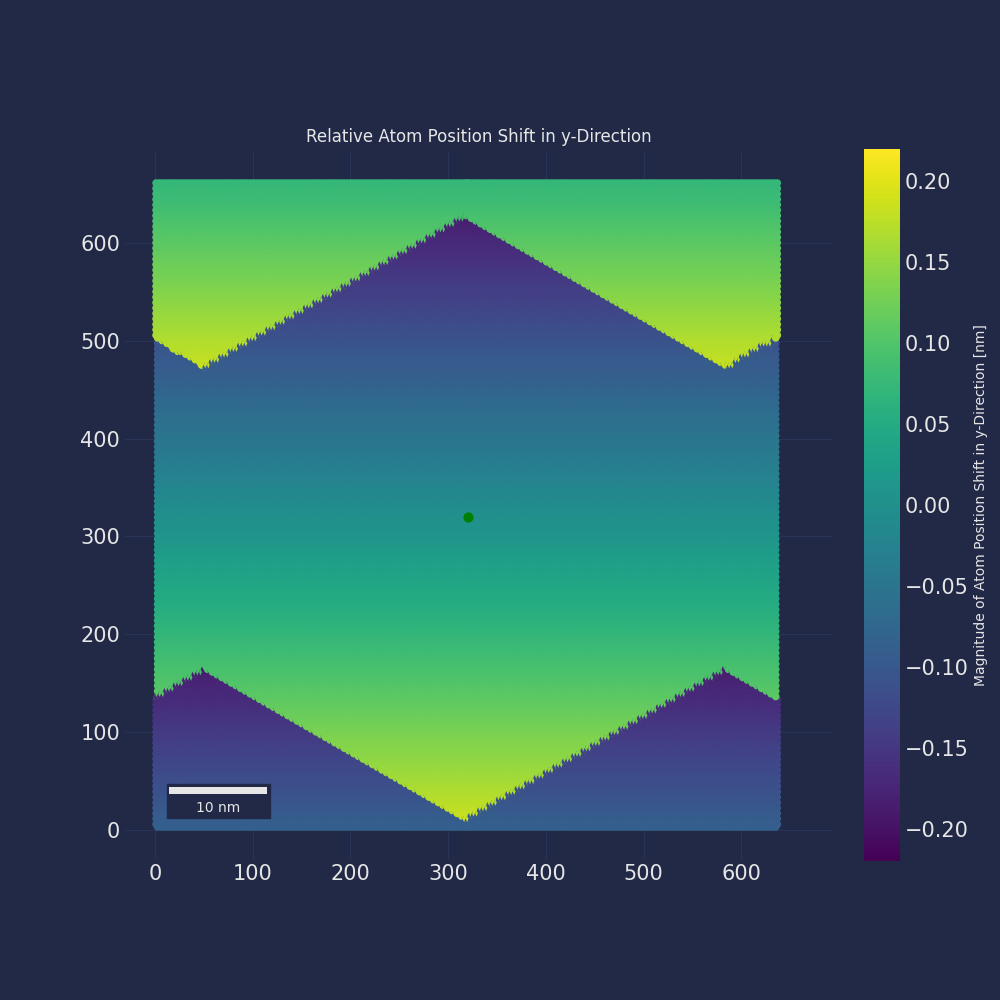

In [31]:
#y-direction
plt.close('all')
sc = plt.scatter(shift_vec_list[:,0], shift_vec_list[:,1],c=shift_vec_list[:,3]*scale_fac_nm,s=20,vmin=-0.22,vmax = 0.22)
plt.scatter(pos1[0],pos1[1], c='green', s = 40)
plt.colorbar(sc,fraction=0.046, pad=0.04, label='Magnitude of Atom Position Shift in y-Direction [nm]')
plt.title('Relative Atom Position Shift in y-Direction')
plt.axis('square')
plt.gca().add_artist(ScaleBar(scale_fac, location='lower left',border_pad=3,color = '0.9',box_color='#212946')) #scalebar in cyberpunk style
plt.show()

# ## test save as svg
# plt.rcParams['svg.fonttype'] = 'none'
# plt.savefig(os.path.join(fp,fsf,"Shift_y_Direction.svg"),dpi = 300)
# plt.savefig(os.path.join(fp,fsf,"Shift_y_Direction.png"),dpi = 300)